**Digits classification using multilayer perciptron and keras Using MNIST**

In [1]:
#import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
from matplotlib import pyplot as plt

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

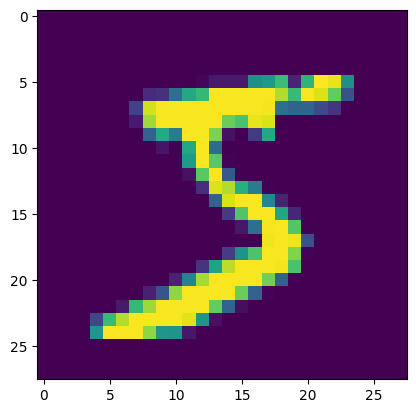

5


In [2]:
#Load the MNIST dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(X_train[0])
plt.imshow(X_train[0])
plt.show()
print(y_train[0])


In [3]:
# Preprocess the data
X_train = X_train.reshape((60000, 28*28)).astype('float32') / 255.0
X_test = X_test.reshape((10000, 28*28)).astype('float32') / 255.0
#to_categorical function is used to convert a class vector (integers) to binary class matrix.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

#Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\raghu\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# training the model 
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=(0.2))

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9076 - loss: 0.3283 - val_accuracy: 0.9524 - val_loss: 0.1736
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9552 - loss: 0.1520 - val_accuracy: 0.9613 - val_loss: 0.1345
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1069 - val_accuracy: 0.9658 - val_loss: 0.1160
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9761 - loss: 0.0825 - val_accuracy: 0.9686 - val_loss: 0.1030
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9823 - loss: 0.0628 - val_accuracy: 0.9699 - val_loss: 0.0966
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9847 - loss: 0.0526 - val_accuracy: 0.9732 - val_loss: 0.0907
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0414 - val_accuracy: 0.9736 - val_loss: 0.0856
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0344 - val_accuracy: 0.

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.9770 - loss: 0.0819
Test loss: 0.08192004263401031
Test accuracy: 0.9769999980926514


In [7]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


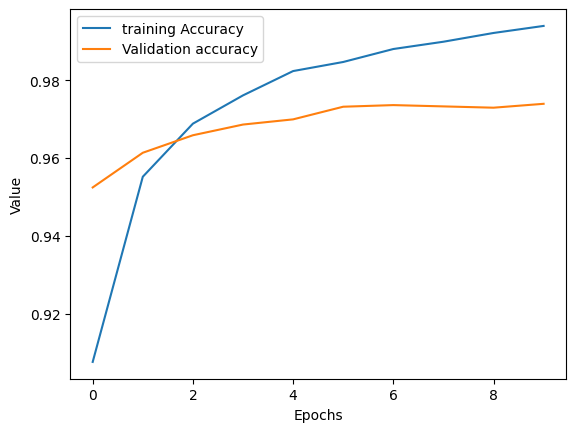

In [8]:
plt.plot(history.history['accuracy'], label='training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

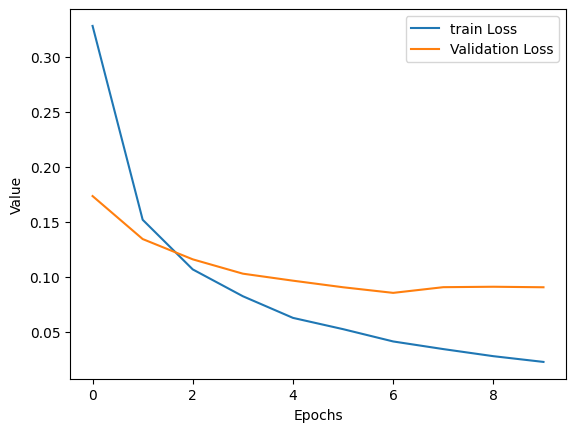

In [9]:
plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()